# TRABAJO PRÁCTICO - APRENDIZAJE AUTOMÁTICO
## Grupo 15
Integrantes:
- Iván Erlich - 105989
- Daniela Ojeda - 107690
- Cristian Martín Lin - 107825



In [ ]:
!pip install pycaret[full]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pycaret.regression import *

El primer paso es **identificar el problema**

Nuestro objetivo es predecir el precio de inmuebles teniendo en cuenta algunos parámetros como lo son: la cantidad de baños, cantidad de dormitorios, cantidad de metros cuadrados, si tiene sotano o no, si hay cuarto de huespedes, etc.

El dataset que estamos usando lo obtuvimos de **Kaggle** y es este https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/tp-aprendizajeautomatico-g15/Housing.csv')
print(data.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

## Variable a predecir
- Price (precio)

## Features Cuantitativos


*  Area
*  Bedrooms
*  Stories
*  Bathrooms
*  Parkings








## Features Cualitativos
 - Furnishingstatus
 - Mainroad
 - Guestroom
 - Basement
 - Prefarea
 - Hotwaterheating
 - Airconditioning

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


## Datos nulos

In [ ]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Datos duplicados

In [ ]:
duplicados = data.duplicated()
print(duplicados)

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool


In [ ]:
print(duplicados.any())

False


## ¿Está balanceado el dataset elegido?

In [ ]:
print(data['price'].describe())

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


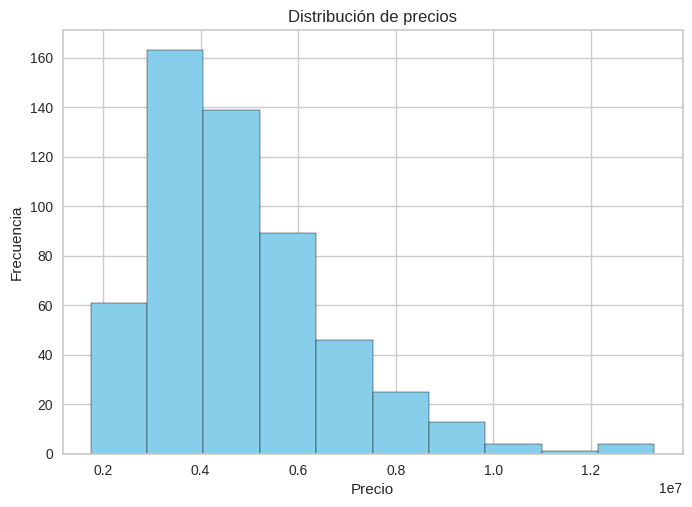

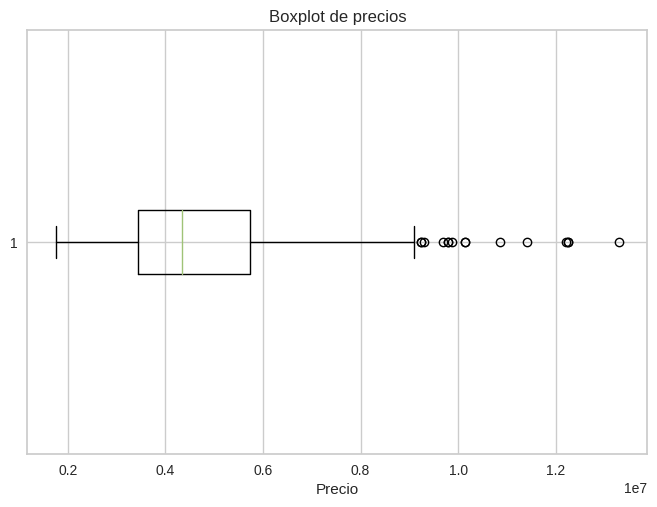

In [ ]:
import matplotlib.pyplot as plt


plt.hist(data['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


plt.boxplot(data['price'], vert=False)
plt.title('Boxplot de precios')
plt.xlabel('Precio')
plt.show()


In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data_filtrada = data[(data['price'] >= lower_limit) & (data['price'] <= upper_limit)]
print(data_filtrada)

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  pa

#Uso PyCaret

Se utiliza PyCaret para poder obtener una comparación entre distintos modelos y ver cuál es el mejor

In [ ]:
exp = setup(data_filtrada,
            target='price',
            normalize=True,
            transformation=True,
            categorical_features=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'],
            numeric_features=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
            remove_outliers=True,
            fold=10)

,Description,Value
0,Session id,7784
1,Target,price
2,Target type,Regression
3,Original data shape,"(530, 13)"
4,Transformed data shape,"(511, 15)"
5,Transformed train set shape,"(352, 15)"
6,Transformed test set shape,"(159, 15)"
7,Numeric features,5
8,Categorical features,7
9,Preprocess,True


## Vamos a comparar los modelos de Linear Regression, CatBoost Regressor, RandomForest Regressor, LightGBM y XGBoost

In [ ]:
models_to_use = ['lr', 'rf', 'catboost', 'xgboost', 'lightgbm']
best_model = compare_models(include=models_to_use)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,740676.5116,957578782524.1598,971610.7181,0.6199,0.2105,0.1704,0.6380
catboost,CatBoost Regressor,761973.1996,1029255066310.0394,1009757.3881,0.5884,0.2186,0.1755,1.9580
lightgbm,Light Gradient Boosting Machine,767123.6037,1026041455252.0927,1008386.8585,0.5865,0.2163,0.1749,0.9260
rf,Random Forest Regressor,759056.2540,1025026396935.8850,1006422.7004,0.5834,0.2186,0.1765,1.6920
xgboost,Extreme Gradient Boosting,825952.8198,1198466920580.8062,1091555.3603,0.5135,0.2368,0.1903,0.3760


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

### Display de los scores de forma prolija

In [ ]:
model_scores = pull()
model_scores = model_scores[['Model', 'RMSE', 'R2', 'MAE', 'MSE']]
model_scores.style.format({'RMSE': '{:,.2f}', 'R2': '{:.2f}', 'MAE': '{:.2f}', 'MSE': '{:.2f}'})

,Model,RMSE,R2,MAE,MSE
lr,Linear Regression,"971,610.72",0.62,740676.51,957578782524.16
catboost,CatBoost Regressor,"1,009,757.39",0.59,761973.20,1029255066310.04
lightgbm,Light Gradient Boosting Machine,"1,008,386.86",0.59,767123.60,1026041455252.09
rf,Random Forest Regressor,"1,006,422.70",0.58,759056.25,1025026396935.89
xgboost,Extreme Gradient Boosting,"1,091,555.36",0.51,825952.82,1198466920580.81


In [ ]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,851427.8626,1083553517006.1066,1040938.7672,0.6537,0.2137,0.1884
1,791776.7435,1044332702628.7192,1021925.9771,0.7073,0.2053,0.1726
2,589536.4916,685602982723.7655,828011.4629,0.7623,0.1985,0.1428
3,716351.6479,1163541064872.5728,1078675.6069,0.6097,0.2248,0.1602
4,814812.3689,1152753955221.9102,1073663.7999,0.4046,0.2460,0.2051
5,766346.5602,840924166626.0496,917019.1746,0.5788,0.1970,0.1736
6,711574.8594,828009005981.7378,909950.0019,0.5488,0.1906,0.1583
7,829649.9028,1262105352511.5112,1123434.6232,0.5644,0.2588,0.2113
8,553440.9133,541370300661.9205,735778.7036,0.7230,0.1583,0.1161


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
final_model = evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_model = best_model
predictions = predict_model(final_model, data_filtrada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,709301.0893,856895311071.8912,925686.4000,0.6630,0.2049,0.1675


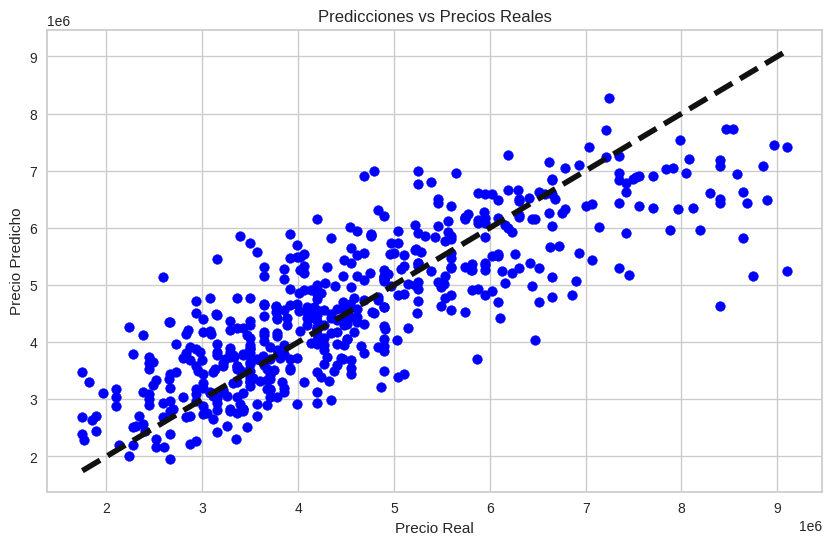

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(data_filtrada['price'], predictions['prediction_label'], color='blue')
plt.plot([data_filtrada['price'].min(), data_filtrada['price'].max()],
         [data_filtrada['price'].min(), data_filtrada['price'].max()], 'k--', lw=4)
plt.title('Predicciones vs Precios Reales')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()


# Uso del método tradicional

## Vamos a usar Linear Regression

In [ ]:
X = data_filtrada.drop('price', axis=1)
y = data_filtrada['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
362,4050,2,1,1,yes,no,no,no,no,0,no,furnished
167,4600,2,2,1,yes,no,no,no,yes,2,no,semi-furnished
386,3850,3,1,1,yes,no,no,no,no,2,no,unfurnished
52,6000,4,2,4,yes,yes,no,no,yes,1,no,furnished
264,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
259,6360,2,1,1,yes,no,yes,no,yes,1,no,furnished
168,4260,4,1,2,yes,no,yes,no,yes,0,no,furnished
89,8580,5,3,2,yes,no,no,no,no,2,no,furnished
191,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [ ]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
350,3420,2,1,2,yes,no,no,yes,no,1,no,semi-furnished
309,4632,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
407,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
356,2520,5,2,1,no,no,yes,no,yes,1,no,furnished
500,2800,3,1,1,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
365,5450,2,1,1,yes,no,no,no,no,0,no,furnished
333,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
129,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
82,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished


In [ ]:
X_validation

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
184,3000,3,2,2,yes,yes,yes,no,no,0,no,furnished
494,6800,2,1,1,yes,no,no,no,no,0,no,unfurnished
419,4960,4,1,3,no,no,no,no,no,0,no,semi-furnished
28,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
239,4000,3,1,2,yes,no,no,no,no,1,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
411,2145,3,1,3,yes,no,no,no,no,0,yes,furnished
507,3600,2,1,1,yes,no,no,no,no,0,no,unfurnished
395,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished
252,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished


## Encoding (BinaryEncoder y MeanEncoder)

In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")
!pip install category_encoders
import category_encoders as ce
from category_encoders import TargetEncoder, BinaryEncoder

## Mean Encoding

In [ ]:
mean_encoder = TargetEncoder()
X_train_encoded = mean_encoder.fit_transform(X_train[['furnishingstatus']], y_train)
X_train = X_train.drop(['furnishingstatus'], axis=1).join(X_train_encoded)
X_train = X_train.rename(columns={'furnishingstatus_t': 'furnishingstatus'})
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
362,4050,2,1,1,yes,no,no,no,no,0,no,5.269748e+06
167,4600,2,2,1,yes,no,no,no,yes,2,no,4.784795e+06
386,3850,3,1,1,yes,no,no,no,no,2,no,3.893547e+06
52,6000,4,2,4,yes,yes,no,no,yes,1,no,5.269748e+06
264,4900,2,1,2,yes,no,yes,no,no,0,no,4.784795e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
259,6360,2,1,1,yes,no,yes,no,yes,1,no,5.269748e+06
168,4260,4,1,2,yes,no,yes,no,yes,0,no,5.269748e+06
89,8580,5,3,2,yes,no,no,no,no,2,no,5.269748e+06
191,10700,3,1,2,yes,yes,yes,no,no,0,no,4.784795e+06


In [ ]:
mean_encoder = TargetEncoder()
X_test_encoded = mean_encoder.fit_transform(X_test[['furnishingstatus']], y_test)
X_test = X_test.drop(['furnishingstatus'], axis=1).join(X_test_encoded)
X_test = X_test.rename(columns={'furnishingstatus_t': 'furnishingstatus'})
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
350,3420,2,1,2,yes,no,no,yes,no,1,no,4.512496e+06
309,4632,4,1,2,yes,no,no,no,yes,0,no,4.512496e+06
407,2145,3,1,3,yes,no,no,no,no,0,yes,4.770985e+06
356,2520,5,2,1,no,no,yes,no,yes,1,no,4.770985e+06
500,2800,3,1,1,yes,no,no,no,no,0,no,4.095359e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
365,5450,2,1,1,yes,no,no,no,no,0,no,4.770985e+06
333,3000,3,1,2,yes,no,no,no,no,0,no,4.512496e+06
129,11460,3,1,3,yes,no,no,no,no,2,yes,4.512496e+06
82,10500,3,2,1,yes,no,yes,no,yes,1,yes,4.770985e+06


In [ ]:
mean_encoder = TargetEncoder()
X_validation_encoded = mean_encoder.fit_transform(X_validation[['furnishingstatus']], y_validation)
X_validation = X_validation.drop(['furnishingstatus'], axis=1).join(X_validation_encoded)
X_validation = X_validation.rename(columns={'furnishingstatus_t': 'furnishingstatus'})
X_validation

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
184,3000,3,2,2,yes,yes,yes,no,no,0,no,4.768505e+06
494,6800,2,1,1,yes,no,no,no,no,0,no,4.377972e+06
419,4960,4,1,3,no,no,no,no,no,0,no,4.859028e+06
28,7950,5,2,2,yes,no,yes,yes,no,2,no,4.377972e+06
239,4000,3,1,2,yes,no,no,no,no,1,no,4.768505e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
411,2145,3,1,3,yes,no,no,no,no,0,yes,4.768505e+06
507,3600,2,1,1,yes,no,no,no,no,0,no,4.377972e+06
395,3600,6,1,2,yes,no,no,no,no,1,no,4.377972e+06
252,9860,3,1,1,yes,no,no,no,no,0,no,4.859028e+06


## BinaryEncoding

In [ ]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_encoding(df, columns):
    df[columns] = df[columns].replace({'yes': 1, 'no': 0})
    return df

X_train = binary_encoding(X_train, binary_columns)
X_test = binary_encoding(X_test, binary_columns)
X_validation = binary_encoding(X_validation, binary_columns)

print(X_train[binary_columns].head())

     mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
362         1          0         0                0                0         0
167         1          0         0                0                1         0
386         1          0         0                0                0         0
52          1          1         0                0                1         0
264         1          0         1                0                0         0


## Regresión Lineal

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lin_reg = LinearRegression()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', lin_reg)
])

parametros = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

rs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=10,
    random_state=13,
    scoring='r2',
    cv=5
)

rs.fit(X_train, y_train)
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)

r2_train = rs.best_score_
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print(f"R² (Validación Cruzada): {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")


R² (Validación Cruzada): 0.6387
Mean Squared Error (MSE): 893118329780.8384
Mean Absolute Error (MAE): 645228.8323


## Evaluación de modelo

In [ ]:
modelo = rs.best_estimator_
modelo

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression(positive=True))])

In [ ]:
modelo.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression(positive=True))])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = modelo.predict(X_validation)

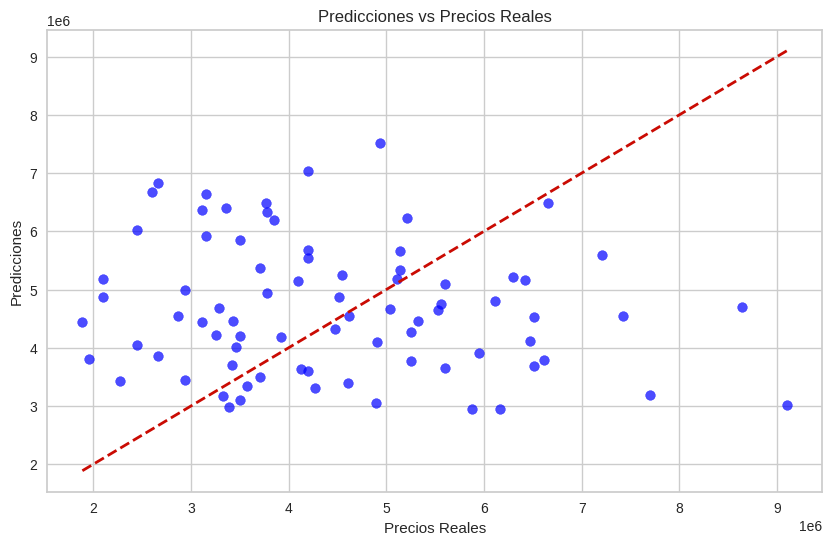

In [ ]:
if len(y_pred) > len(y_test):
    y_pred = y_pred[:len(y_test)]


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicciones vs Precios Reales")
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()


## ¿Qué features fueron las más relevantes para predecir el precio de los inmuebles?

In [ ]:
modelo_regresion = modelo.named_steps['regressor']

coeficientes = modelo_regresion.coef_

             Feature    Coefficient  Abs_Coefficient
0               area  426449.387451    426449.387451
8    airconditioning  401591.216094    401591.216094
3            stories  380707.641313    380707.641313
2          bathrooms  346444.994285    346444.994285
11  furnishingstatus  212504.476063    212504.476063
10          prefarea  201162.314512    201162.314512
6           basement  160987.710090    160987.710090
9            parking  156856.747140    156856.747140
5          guestroom  150228.168776    150228.168776
4           mainroad  139470.325241    139470.325241
7    hotwaterheating  109638.182572    109638.182572
1           bedrooms   40337.703119     40337.703119


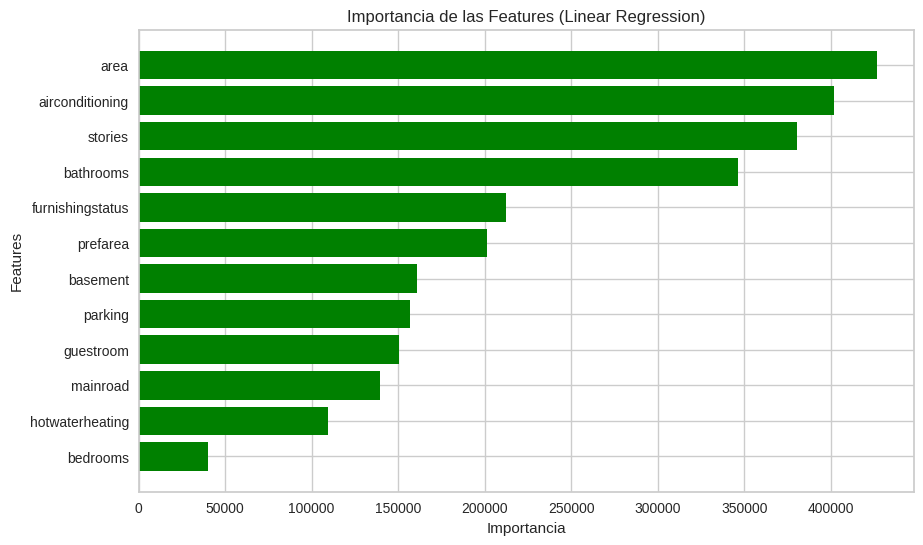

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


features = X_train.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeficientes
})


feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='green')
plt.gca().invert_yaxis()
plt.title('Importancia de las Features (Linear Regression)')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()


##Conclusión
El modelo de Regresión Lineal es el más confiable para predecir precios de los inmuebles. Decidimos focalizarnos en el score R2. Obtuvimos valores similares utilizando LinearRegression tanto con la forma tradicional como con PyCaret. Los valores obtenidos se encuentran entre 0.5 y 0.7 por lo que están dentro del rango aceptable. También podemos ver como influye mucho el área, presencia de entrepisos y que cuente con aire acondicionado. En cambio, la existencia de varias habitaciones y habitación de huespedes no influyen mucho para determinar la tasación.